**Τα tweets από το Πρώτο Θέμα σχετικά με τον εμβολιασμό**

In [1]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

     |████████████████████████████████| 911kB 7.6MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


In [ ]:
import time

from bs4 import BeautifulSoup

#driver = webdriver.Chrome()
driver.implicitly_wait(30)

# download webdriver from https://chromedriver.storage.googleapis.com/index.html?path=83.0.4103.39/
# and put the executable in /usr/local/bin


**Αναζητούμε όλα τα άρθρα που είναι σχετικά με τον εμβολιασμό κατά της Covid-19 **

In [ ]:
try:
    SCROLL_PAUSE_TIME = 3.5
    driver.get("https://www.protothema.gr/anazitisi/?q=%CE%B5%CE%BC%CE%B2%CF%8C%CE%BB%CE%B9%CE%BF")

    last_height = driver.execute_script("return document.body.scrollHeight")

    while (last_height < 42000):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(SCROLL_PAUSE_TIME)
        new_height = driver.execute_script("return document.body.scrollHeight")
        print('height:', new_height)
        if new_height == last_height:
            print('height =' , new_height)
            break
        last_height = new_height



finally:
#    driver.quit()
    print("OK")

height: 5660
height: 8044
height: 10296
height: 12728
height: 15066
height: 17071
height: 19216
height: 21492
height: 23627
height: 25825
height: 27963
height: 29947
height: 31947
height: 34062
height: 34062
height = 34062
OK


In [ ]:
soup = BeautifulSoup(driver.page_source, "html.parser")

In [ ]:
stories_list = []

stories = soup.find_all('div', { 'class': 'article' })

for story in stories:
    heading = story.find('h3')
    link = heading.find('a')
    date = story.find('time')
    datetime = date['datetime']

    
    story_dict = {
        'headline': heading.text,
        'url': link['href'],
        'date': datetime
    }
     
    # Πρόσθεσε το λέξικο στη λίστα
    stories_list.append(story_dict)

In [ ]:
print(len(stories_list))

160


In [ ]:
import pandas as pd
df = pd.DataFrame(stories_list)

In [ ]:
df

,headline,url,date
0,\nΕμβόλιο AstraZeneca: H τρίτη δόση παράγει ισ...,https://www.protothema.gr/world/article/113802...,2021-06-28T15:52:00+03:00
1,\nΜητσοτάκης: Προπληρωμένη κάρτα ύψους 150 ευρ...,https://www.protothema.gr/politics/article/113...,2021-06-28T12:05:00+03:00
2,\nΓεωργιάδης: Δεν έχουμε δικαίωμα να περιορίζο...,https://www.protothema.gr/politics/article/113...,2021-06-28T10:39:00+03:00
3,\nΜετάλλαξη Δέλτα: Πόσο κοντά είναι το τέταρτο...,https://www.protothema.gr/greece/article/11378...,2021-06-28T09:59:00+03:00
4,\nΜετάλλαξη Δέλτα – Λινού: Βιώνουμε κάτι που μ...,https://www.protothema.gr/koronoios-live/artic...,2021-06-28T09:13:00+03:00
...,...,...,...
155,\nΌσα γνωρίζουμε για τα εμβόλια και την αποτελ...,https://www.protothema.gr/world/article/113441...,2021-06-16T14:35:00+03:00
156,\nΤσίπρας σε Μητσοτάκη: «Ξεστοκάρετε» στους νέ...,https://www.protothema.gr/politics/article/113...,2021-06-16T13:32:00+03:00
157,"\nΑσία: Εμβολιαστείτε και κερδίστε... κότες, α...",https://www.protothema.gr/world/article/113439...,2021-06-16T13:31:00+03:00
158,\n Γιατί καθυστερεί η έγκριση του ρωσικού εμβο...,https://www.protothema.gr/koronoios-live/artic...,2021-06-16T12:47:00+03:00


In [ ]:
df.sort_values(by='date', ascending = False)

,headline,url,date
0,\nΓεωργιάδης: Δεν έχουμε δικαίωμα να περιορίζο...,https://www.protothema.gr/politics/article/113...,2021-06-28T10:39:00+03:00
1,\nΜετάλλαξη Δέλτα: Πόσο κοντά είναι το τέταρτο...,https://www.protothema.gr/greece/article/11378...,2021-06-28T09:59:00+03:00
2,\nΜετάλλαξη Δέλτα – Λινού: Βιώνουμε κάτι που μ...,https://www.protothema.gr/koronoios-live/artic...,2021-06-28T09:13:00+03:00
3,\nO Ιωάννης Παπαζήσης εμβολιάστηκε κατά της Co...,https://www.protothema.gr/life-style/article/1...,2021-06-28T06:26:06+03:00
4,\n Καταργήθηκε η απαγόρευση κυκλοφορίας – Ανακ...,https://www.protothema.gr/greece/article/11377...,2021-06-28T06:24:00+03:00
...,...,...,...
185,\nΠόλεμος για το «AstraZeneca»: Μεγάλη προσέλ...,https://www.protothema.gr/koronoios-live/artic...,2021-06-15T20:05:00+03:00
186,\nΚικίλιας: Να γίνεται η δεύτερη δόση του Astr...,https://www.protothema.gr/greece/article/11341...,2021-06-15T19:05:05+03:00
187,\nΚορωνοϊός και Κύηση: Οι κίνδυνοι για την γυν...,https://www.protothema.gr/zoi/article/1133917/...,2021-06-15T18:30:00+03:00
188,\nΠροβληματισμός για τον εμβολιασμό με AstraZe...,https://www.protothema.gr/greece/article/11341...,2021-06-15T17:20:00+03:00


In [ ]:
df.tail()

,headline,url,date
185,\nΠόλεμος για το «AstraZeneca»: Μεγάλη προσέλ...,https://www.protothema.gr/koronoios-live/artic...,2021-06-15T20:05:00+03:00
186,\nΚικίλιας: Να γίνεται η δεύτερη δόση του Astr...,https://www.protothema.gr/greece/article/11341...,2021-06-15T19:05:05+03:00
187,\nΚορωνοϊός και Κύηση: Οι κίνδυνοι για την γυν...,https://www.protothema.gr/zoi/article/1133917/...,2021-06-15T18:30:00+03:00
188,\nΠροβληματισμός για τον εμβολιασμό με AstraZe...,https://www.protothema.gr/greece/article/11341...,2021-06-15T17:20:00+03:00
189,\nΚέιτ Μος: Από τις πασαρέλες... στα τατουατζί...,https://www.protothema.gr/life-style/article/1...,2021-06-15T16:57:00+03:00


Σώζουμε τα δεδομένα μας σε ένα αρχείο csv

In [ ]:
df.to_csv("protothemacovid_emvolio.csv", index=False)

In [ ]:
import pandas as pd
%matplotlib inline

In [ ]:
df = pd.read_csv("protothemacovid_emvolio.csv")

In [ ]:
df.tail()

,headline,url,date
185,\nΠόλεμος για το «AstraZeneca»: Μεγάλη προσέλ...,https://www.protothema.gr/koronoios-live/artic...,2021-06-15T20:05:00+03:00
186,\nΚικίλιας: Να γίνεται η δεύτερη δόση του Astr...,https://www.protothema.gr/greece/article/11341...,2021-06-15T19:05:05+03:00
187,\nΚορωνοϊός και Κύηση: Οι κίνδυνοι για την γυν...,https://www.protothema.gr/zoi/article/1133917/...,2021-06-15T18:30:00+03:00
188,\nΠροβληματισμός για τον εμβολιασμό με AstraZe...,https://www.protothema.gr/greece/article/11341...,2021-06-15T17:20:00+03:00
189,\nΚέιτ Μος: Από τις πασαρέλες... στα τατουατζί...,https://www.protothema.gr/life-style/article/1...,2021-06-15T16:57:00+03:00


In [ ]:
df[1:20]

,headline,url,date
1,\nΜετάλλαξη Δέλτα: Πόσο κοντά είναι το τέταρτο...,https://www.protothema.gr/greece/article/11378...,2021-06-28T09:59:00+03:00
2,\nΜετάλλαξη Δέλτα – Λινού: Βιώνουμε κάτι που μ...,https://www.protothema.gr/koronoios-live/artic...,2021-06-28T09:13:00+03:00
3,\nO Ιωάννης Παπαζήσης εμβολιάστηκε κατά της Co...,https://www.protothema.gr/life-style/article/1...,2021-06-28T06:26:06+03:00
4,\n Καταργήθηκε η απαγόρευση κυκλοφορίας – Ανακ...,https://www.protothema.gr/greece/article/11377...,2021-06-28T06:24:00+03:00
5,\nΠανδημία-Τουρκία: Σχεδόν 4.900 κρούσματα και...,https://www.protothema.gr/koronoios-live/artic...,2021-06-28T04:55:13+03:00
6,"\nΤέλος στην απαγόρευση κυκλοφορίας, χωρίς sel...",https://www.protothema.gr/greece/article/11377...,2021-06-27T22:27:00+03:00
7,\nΓκάλοπ MARC για το «Πρώτο ΘΕΜΑ»: 65% υποχρεω...,https://www.protothema.gr/greece/article/11375...,2021-06-27T19:43:00+03:00
8,\nΤο υποχρεωτικό εμβόλιο\n,https://www.protothema.gr/blogs/tasos-karamits...,2021-06-27T12:53:35+03:00
9,\nΜετάλλαξη Δέλτα: Ίσως χρειαστεί και ενισχυτι...,https://www.protothema.gr/koronoios-live/artic...,2021-06-27T12:03:00+03:00
10,"\nΠαγκόσμιος Οργανισμός Υγείας: Μάσκα, αποστάσ...",https://www.protothema.gr/koronoios-live/artic...,2021-06-27T11:46:00+03:00


In [ ]:
df.dtypes

headline    object
url         object
date        object
dtype: object

In [ ]:
import numpy as np
df['headline'].replace(':', np.nan, inplace=True)

In [ ]:
df.headline.astype(object)

0      \nΓεωργιάδης: Δεν έχουμε δικαίωμα να περιορίζο...
1      \nΜετάλλαξη Δέλτα: Πόσο κοντά είναι το τέταρτο...
2      \nΜετάλλαξη Δέλτα – Λινού: Βιώνουμε κάτι που μ...
3      \nO Ιωάννης Παπαζήσης εμβολιάστηκε κατά της Co...
4      \n Καταργήθηκε η απαγόρευση κυκλοφορίας – Ανακ...
                             ...                        
185    \nΠόλεμος για το «AstraZeneca»:  Μεγάλη προσέλ...
186    \nΚικίλιας: Να γίνεται η δεύτερη δόση του Astr...
187    \nΚορωνοϊός και Κύηση: Οι κίνδυνοι για την γυν...
188    \nΠροβληματισμός για τον εμβολιασμό με AstraZe...
189    \nΚέιτ Μος: Από τις πασαρέλες... στα τατουατζί...
Name: headline, Length: 190, dtype: object

In [ ]:
def replace(val):
    return(val.replace(',',''))

In [ ]:
df['headline'] = df.apply(replace, axis=1)

In [ ]:
df.dtypes

headline    object
url         object
date        object
dtype: object

In [ ]:
import pandas as pd
%matplotlib inline
df = pd.read_csv("protothemacovid_emvolio.csv")

In [ ]:
df

NameError: ignored

In [ ]:
df.dtypes

headline    object
url         object
date        object
dtype: object

In [ ]:
pd.to_datetime(df.date).head()

0   2021-06-28 10:39:00+03:00
1   2021-06-28 09:59:00+03:00
2   2021-06-28 09:13:00+03:00
3   2021-06-28 06:26:06+03:00
4   2021-06-28 06:24:00+03:00
Name: date, dtype: datetime64[ns, pytz.FixedOffset(180)]

In [ ]:
%%time
pd.to_datetime(df.date).head() 

CPU times: user 4.77 ms, sys: 0 ns, total: 4.77 ms
Wall time: 4.83 ms


0   2021-06-28 10:39:00+03:00
1   2021-06-28 09:59:00+03:00
2   2021-06-28 09:13:00+03:00
3   2021-06-28 06:26:06+03:00
4   2021-06-28 06:24:00+03:00
Name: date, dtype: datetime64[ns, pytz.FixedOffset(180)]

In [ ]:
%%time
pd.to_datetime(df.date, format='%Y-%m-%d').head()

CPU times: user 3.09 ms, sys: 2 µs, total: 3.1 ms
Wall time: 3.5 ms


0   2021-06-28 10:39:00+03:00
1   2021-06-28 09:59:00+03:00
2   2021-06-28 09:13:00+03:00
3   2021-06-28 06:26:06+03:00
4   2021-06-28 06:24:00+03:00
Name: date, dtype: datetime64[ns, pytz.FixedOffset(180)]

In [ ]:
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')
df['date']

0     2021-06-28 10:39:00+03:00
1     2021-06-28 09:59:00+03:00
2     2021-06-28 09:13:00+03:00
3     2021-06-28 06:26:06+03:00
4     2021-06-28 06:24:00+03:00
                 ...           
185   2021-06-15 20:05:00+03:00
186   2021-06-15 19:05:05+03:00
187   2021-06-15 18:30:00+03:00
188   2021-06-15 17:20:00+03:00
189   2021-06-15 16:57:00+03:00
Name: date, Length: 190, dtype: datetime64[ns, pytz.FixedOffset(180)]

In [ ]:
df.dtypes

headline                                   object
url                                        object
date        datetime64[ns, pytz.FixedOffset(180)]
dtype: object

In [ ]:
df.set_index('date' , inplace=True)

In [ ]:
df['2021']

,headline,url
date,,
2021-06-28 10:39:00+03:00,\nΓεωργιάδης: Δεν έχουμε δικαίωμα να περιορίζο...,https://www.protothema.gr/politics/article/113...
2021-06-28 09:59:00+03:00,\nΜετάλλαξη Δέλτα: Πόσο κοντά είναι το τέταρτο...,https://www.protothema.gr/greece/article/11378...
2021-06-28 09:13:00+03:00,\nΜετάλλαξη Δέλτα – Λινού: Βιώνουμε κάτι που μ...,https://www.protothema.gr/koronoios-live/artic...
2021-06-28 06:26:06+03:00,\nO Ιωάννης Παπαζήσης εμβολιάστηκε κατά της Co...,https://www.protothema.gr/life-style/article/1...
2021-06-28 06:24:00+03:00,\n Καταργήθηκε η απαγόρευση κυκλοφορίας – Ανακ...,https://www.protothema.gr/greece/article/11377...
...,...,...
2021-06-15 20:05:00+03:00,\nΠόλεμος για το «AstraZeneca»: Μεγάλη προσέλ...,https://www.protothema.gr/koronoios-live/artic...
2021-06-15 19:05:05+03:00,\nΚικίλιας: Να γίνεται η δεύτερη δόση του Astr...,https://www.protothema.gr/greece/article/11341...
2021-06-15 18:30:00+03:00,\nΚορωνοϊός και Κύηση: Οι κίνδυνοι για την γυν...,https://www.protothema.gr/zoi/article/1133917/...


**παίρνουμε τις γραμμές ανάμεσα σε συγκεκριμένες ημερομηνίες**

In [ ]:
df['2021'].head()

,headline,url
date,,
2021-06-28 10:39:00+03:00,\nΓεωργιάδης: Δεν έχουμε δικαίωμα να περιορίζο...,https://www.protothema.gr/politics/article/113...
2021-06-28 09:59:00+03:00,\nΜετάλλαξη Δέλτα: Πόσο κοντά είναι το τέταρτο...,https://www.protothema.gr/greece/article/11378...
2021-06-28 09:13:00+03:00,\nΜετάλλαξη Δέλτα – Λινού: Βιώνουμε κάτι που μ...,https://www.protothema.gr/koronoios-live/artic...
2021-06-28 06:26:06+03:00,\nO Ιωάννης Παπαζήσης εμβολιάστηκε κατά της Co...,https://www.protothema.gr/life-style/article/1...
2021-06-28 06:24:00+03:00,\n Καταργήθηκε η απαγόρευση κυκλοφορίας – Ανακ...,https://www.protothema.gr/greece/article/11377...


**Επιλέγουμε τον μήνα Ιούνιο**

In [ ]:
df[df.index.month == 6]

,headline,url
date,,
2021-06-28 10:39:00+03:00,\nΓεωργιάδης: Δεν έχουμε δικαίωμα να περιορίζο...,https://www.protothema.gr/politics/article/113...
2021-06-28 09:59:00+03:00,\nΜετάλλαξη Δέλτα: Πόσο κοντά είναι το τέταρτο...,https://www.protothema.gr/greece/article/11378...
2021-06-28 09:13:00+03:00,\nΜετάλλαξη Δέλτα – Λινού: Βιώνουμε κάτι που μ...,https://www.protothema.gr/koronoios-live/artic...
2021-06-28 06:26:06+03:00,\nO Ιωάννης Παπαζήσης εμβολιάστηκε κατά της Co...,https://www.protothema.gr/life-style/article/1...
2021-06-28 06:24:00+03:00,\n Καταργήθηκε η απαγόρευση κυκλοφορίας – Ανακ...,https://www.protothema.gr/greece/article/11377...
...,...,...
2021-06-15 20:05:00+03:00,\nΠόλεμος για το «AstraZeneca»: Μεγάλη προσέλ...,https://www.protothema.gr/koronoios-live/artic...
2021-06-15 19:05:05+03:00,\nΚικίλιας: Να γίνεται η δεύτερη δόση του Astr...,https://www.protothema.gr/greece/article/11341...
2021-06-15 18:30:00+03:00,\nΚορωνοϊός και Κύηση: Οι κίνδυνοι για την γυν...,https://www.protothema.gr/zoi/article/1133917/...


In [ ]:
df[df.index.month.isin([5,6])]

,headline,url
date,,
2021-06-28 10:39:00+03:00,\nΓεωργιάδης: Δεν έχουμε δικαίωμα να περιορίζο...,https://www.protothema.gr/politics/article/113...
2021-06-28 09:59:00+03:00,\nΜετάλλαξη Δέλτα: Πόσο κοντά είναι το τέταρτο...,https://www.protothema.gr/greece/article/11378...
2021-06-28 09:13:00+03:00,\nΜετάλλαξη Δέλτα – Λινού: Βιώνουμε κάτι που μ...,https://www.protothema.gr/koronoios-live/artic...
2021-06-28 06:26:06+03:00,\nO Ιωάννης Παπαζήσης εμβολιάστηκε κατά της Co...,https://www.protothema.gr/life-style/article/1...
2021-06-28 06:24:00+03:00,\n Καταργήθηκε η απαγόρευση κυκλοφορίας – Ανακ...,https://www.protothema.gr/greece/article/11377...
...,...,...
2021-06-15 20:05:00+03:00,\nΠόλεμος για το «AstraZeneca»: Μεγάλη προσέλ...,https://www.protothema.gr/koronoios-live/artic...
2021-06-15 19:05:05+03:00,\nΚικίλιας: Να γίνεται η δεύτερη δόση του Astr...,https://www.protothema.gr/greece/article/11341...
2021-06-15 18:30:00+03:00,\nΚορωνοϊός και Κύηση: Οι κίνδυνοι για την γυν...,https://www.protothema.gr/zoi/article/1133917/...


**ΑΝΑΛΥΣΗ TWEETS ΑΠΟ ΤΟ ΠΡΟΦΙΛ ΤΟΥ ΠΡΩΤΟΥ ΘΕΜΑΤΟΣ**

**Στη συνέχεια θα αναλύσουμε τα tweets που έγιναν στο λογαριασμό του Πρώτου θέματος για την πανδημία Covid-19**

In [ ]:
!pip install Twython
import pandas as pd
import numpy as np 
from twython import Twython

CONSUMER_KEY = "f7RkCP05ax6m5R75e7NEROblP"
CONSUMER_SECRET = "zXiRP1rQBy9d2bDuAFpwD98zzkmslML769iY0jhLDjpH88dmfM"
OAUTH_TOKEN = "994129208233295872-BdzZ761Mi4hxjWK2kRno4Fx3mlOd0wH"
OAUTH_TOKEN_SECRET = "E3HfihiBifLdCWOaoudr5hbJUdduovpTIFjRyAqC9nGs3"
twitter = Twython(
    CONSUMER_KEY, CONSUMER_SECRET,
    OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

In [ ]:
tweetsL = []
try:
    user_timeline = twitter.get_user_timeline(screen_name='protothema',count=100, tweet_mode = 'extended'  )
except TwythonError as e:
    print("Error getting tweets:", e)
print("I Got:", len(user_timeline), " tweets")
for tweet in user_timeline:
    # Add whatever you want from the tweet, here we just add the text
    tweetsL.append(tweet)

I Got: 100  tweets


In [ ]:
# Count could be less than 200, see:
# https://dev.twitter.com/discussions/7513
while len(user_timeline) != 0: 
    try:
        user_timeline = twitter.get_user_timeline(screen_name='protothema',count=100,
                                                  tweet_mode = 'extended', max_id=user_timeline[len(user_timeline)-1]['id']-1)
    except TwythonError as e:
        print("Error getting tweets:", e)
    if len(user_timeline) > 0:
        print("I Got:", len(user_timeline), " tweets more... Last ID:", user_timeline[len(user_timeline)-1]['id']-1)
    for tweet in user_timeline:
        # Add whatever you want from the tweet, here we just add the text
        tweetsL.append(tweet)
# Number of tweets the user has made
print("I got :", len(tweetsL), " in total!!!")

I Got: 100  tweets more... Last ID: 1408820807418236933
I Got: 100  tweets more... Last ID: 1408440563842662401
I Got: 100  tweets more... Last ID: 1408233594313662464
I Got: 100  tweets more... Last ID: 1407962350976704514
I Got: 100  tweets more... Last ID: 1407654901660930052
I Got: 100  tweets more... Last ID: 1407339043621326853
I Got: 100  tweets more... Last ID: 1407071764929187841
I Got: 100  tweets more... Last ID: 1406495359346659331
I Got: 100  tweets more... Last ID: 1405868578457501704
I Got: 100  tweets more... Last ID: 1405541109900578817
I Got: 100  tweets more... Last ID: 1405271528229408770
I Got: 100  tweets more... Last ID: 1404969609527279617
I Got: 100  tweets more... Last ID: 1404681368379052035
I Got: 100  tweets more... Last ID: 1404375740964032511
I Got: 100  tweets more... Last ID: 1404083417415925759
I Got: 100  tweets more... Last ID: 1403646137416966147
I Got: 100  tweets more... Last ID: 1403291013045686280
I Got: 100  tweets more... Last ID: 140292961613

In [ ]:
len(tweetsL)

3250

In [ ]:
for tweet in tweetsL:
    print(tweet['created_at'],tweet['full_text'])

Mon Jun 28 10:25:35 +0000 2021 Τριχωνίδα: 42χρονος ιερέας φέρεται να ασέλγησε σε γυναίκα μπροστά στα μάτια του συζύγου της! https://t.co/fz0ES1Tp9L
Mon Jun 28 10:08:02 +0000 2021 Τριχωνίδα: 42χρονος ιερέας φέρεται να ασέλγησε σε γυναίκα μπροστά στα μάτια του συζύγου της! https://t.co/HL6db2Ygql
Mon Jun 28 09:55:20 +0000 2021 Χανιά: Πήρε προθεσμία ο 49χρονος Γεωργιανός που δολοφόνησε ομοεθνή του στις φυλακές https://t.co/uuKMq9mIgZ
Mon Jun 28 09:52:23 +0000 2021 Γλυκά Νερά: Νέο βίντεο του πιλότου μέσα από τις φυλακές Κορυδαλλού – H Λυδία και το «2ο ημερολόγιο» https://t.co/mTktYFmSoi
Mon Jun 28 09:49:53 +0000 2021 Μετάλλαξη Δέλτα: Η Γερμανία θα επιδιώξει να απαγορευθεί η είσοδος όλων των ταξιδιωτών από τη Βρετανία στην ΕΕ (The Times) https://t.co/rQ58K4cBuX
Mon Jun 28 09:40:48 +0000 2021 Τα σούπερ γιοτ των πλουσίων ρίχνουν... άγκυρα στην Ελλάδα - Η χώρα κατακτά την πρώτη θέση στη λίστα του Bloomberg https://t.co/UC05tUtocQ
Mon Jun 28 09:35:56 +0000 2021 Αλβανία: Στο «κόκκινο» ο πόλεμος 

In [ ]:
tweetsL[10]['full_text']

'Μητσοτάκης: Προπληρωμένη κάρτα 150 ευρώ σε εμβολιασμένους νέους ηλικίας 18-25 ετών https://t.co/DMi19XhxiC'

In [ ]:
tweetsL[500]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Thu Jun 24 07:17:57 +0000 2021',
 'display_text_range': [0, 118],
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [{'display_url': 'protothema.gr/greece/article…',
    'expanded_url': 'https://www.protothema.gr/greece/article/1136688/epithesi-me-vitrioli-sokaristikes-eikones-apo-tin-aithousa-pou-o-drastis-erixe-to-kaustiko-ugro/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1624518579',
    'indices': [95, 118],
    'url': 'https://t.co/ILUoqts787'}],
  'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'full_text': 'Επίθεση με βιτριόλι: Σοκαριστικές εικόνες από την αίθουσα που ο δράστης έριξε το καυστικό υγρό https://t.co/ILUoqts787',
 'geo': None,
 'id': 1407961174516416512,
 'id_str': '1407961174516416512',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_s

In [ ]:
tweets_df = pd.DataFrame(tweetsL)

In [ ]:
tweets_df.head(15)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,extended_entities,retweeted_status
0,Mon Jun 28 10:25:35 +0000 2021,1409457947823030275,1409457947823030275,Τριχωνίδα: 42χρονος ιερέας φέρεται να ασέλγησε...,False,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://www.echobox.com"" rel=""nofollo...",None,None,None,None,None,"{'id': 25584888, 'id_str': '25584888', 'name':...",None,None,None,None,False,0,0,False,False,False,el,NaN,NaN
1,Mon Jun 28 10:08:02 +0000 2021,1409453528603631619,1409453528603631619,Τριχωνίδα: 42χρονος ιερέας φέρεται να ασέλγησε...,False,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,None,None,None,None,"{'id': 25584888, 'id_str': '25584888', 'name':...",None,None,None,None,False,1,1,False,False,False,el,NaN,NaN
2,Mon Jun 28 09:55:20 +0000 2021,1409450333068201984,1409450333068201984,Χανιά: Πήρε προθεσμία ο 49χρονος Γεωργιανός πο...,False,"[0, 107]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,None,None,None,None,"{'id': 25584888, 'id_str': '25584888', 'name':...",None,None,None,None,False,0,0,False,False,False,el,NaN,NaN
3,Mon Jun 28 09:52:23 +0000 2021,1409449590940700676,1409449590940700676,Γλυκά Νερά: Νέο βίντεο του πιλότου μέσα από τι...,False,"[0, 99]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,None,None,None,None,"{'id': 25584888, 'id_str': '25584888', 'name':...",None,None,None,None,False,0,0,False,False,False,el,"{'media': [{'id': 1409449069777506304, 'id_str...",NaN
4,Mon Jun 28 09:49:53 +0000 2021,1409448964001255426,1409448964001255426,Μετάλλαξη Δέλτα: Η Γερμανία θα επιδιώξει να απ...,False,"[0, 145]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://www.echobox.com"" rel=""nofollo...",None,None,None,None,None,"{'id': 25584888, 'id_str': '25584888', 'name':...",None,None,None,None,False,1,0,False,False,False,el,NaN,NaN
5,Mon Jun 28 09:40:48 +0000 2021,1409446674452340744,1409446674452340744,Τα σούπερ γιοτ των πλουσίων ρίχνουν... άγκυρα ...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,None,None,None,None,"{'id': 25584888, 'id_str': '25584888', 'name':...",None,None,None,None,False,0,0,False,False,False,el,NaN,NaN
6,Mon Jun 28 09:35:56 +0000 2021,1409445450936160258,1409445450936160258,Αλβανία: Στο «κόκκινο» ο πόλεμος της… ξαπλώστρ...,False,"[0, 86]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,None,None,None,None,"{'id': 25584888, 'id_str': '25584888', 'name':...",None,None,None,None,False,0,1,False,False,False,el,NaN,NaN
7,Mon Jun 28 09:29:11 +0000 2021,1409443751085412357,1409443751085412357,Μετά τον Σπανούλη ο Ζήσης: Έριξε τίτλους τέλου...,False,"[0, 94]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,None,None,None,None,"{'id': 25584888, 'id_str': '25584888', 'name':...",None,None,None,None,False,0,2,False,False,False,el,NaN,NaN
8,Mon Jun 28 09:28:00 +0000 2021,1409443453583474694,1409443453583474694,Μετά τον Σπανούλη ο Ζήσης: Έριξε τίτλους τέλου...,False,"[0, 94]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,None,None,None,None,"{'id': 25584888, 'id_str': '25584888', 'name':...",None,None,None,None,False,0,4,False,False,False,el,NaN,NaN
9,Mon Jun 28 09:22:14 +0000 2021,1409442002589126660,1409442002589126660,Γιούαν ΜακΓκρέγκορ: Έγινε για πέμπτη φορά μπαμ...,False,"[0, 111]","{'hashtags'

Βρίσκουμε τη συχνότητα των άρθρων

In [ ]:
df['headline'].value_counts()

\nΠαναγιωτόπουλος: Γιατί παύει να χορηγείται το εμβόλιο της AstraZeneca στους κάτω των 60  \n              1
\nΚορωνοϊός – Εμβόλια: Ποιοι παράγουν λιγότερα αντισώματα – Τα φάρμακα που καθυστερούν την ανοσία\n        1
\nΤέλος στην απαγόρευση κυκλοφορίας, χωρίς self-tests οι εμβολιασμένοι - Τι αλλάζει από Δευτέρα\n          1
\nΣυναγερμός για την μετάλλαξη «Δέλτα» - «Μόνη λύση οι εμβολιασμοί και όχι οι περιορισμοί»\n               1
\nΤο υποχρεωτικό εμβόλιο\n                                                                                 1
                                                                                                          ..
\nΈκκληση Μητσοτάκη για εμβολιασμούς - Δεν φτάνει το 50% - 55% - Ανησυχούμε για την παραλλαγή «Δέλτα»\n    1
\nAsap Rocky: «Η Ριάνα με ενέπνευσε να πω την αληθινή ιστορία για την φυλάκισή μου στη Στοκχόλμη»\n        1
\nΗ Ζαχαρούλα Κληματσάκη παρουσιάζει το νέο τραγούδι του Σπύρου Γραμμένου "Μήπως έχεις φωτιά;"\n           1
\nΚέιτ Μος: Από τις

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
tweets_df.to_csv("/content/gdrive/My Drive/Colab Notebooks/protothematweets.tsv", sep='\t')

**Εισάγουμε τα εργαλεία που θα χρησιμοποιήσουμε στο text analysis**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
full_tweets_df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/protothematweets.tsv", sep='\t')

In [ ]:
full_tweets_df.head()

,Unnamed: 0,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,extended_entities,retweeted_status
0,0,Mon Jun 28 10:25:35 +0000 2021,1409457947823030275,1409457947823030275,Τριχωνίδα: 42χρονος ιερέας φέρεται να ασέλγησε...,False,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://www.echobox.com"" rel=""nofollo...",NaN,NaN,NaN,NaN,NaN,"{'id': 25584888, 'id_str': '25584888', 'name':...",NaN,NaN,NaN,NaN,False,0,0,False,False,False,el,NaN,NaN
1,1,Mon Jun 28 10:08:02 +0000 2021,1409453528603631619,1409453528603631619,Τριχωνίδα: 42χρονος ιερέας φέρεται να ασέλγησε...,False,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,"{'id': 25584888, 'id_str': '25584888', 'name':...",NaN,NaN,NaN,NaN,False,1,1,False,False,False,el,NaN,NaN
2,2,Mon Jun 28 09:55:20 +0000 2021,1409450333068201984,1409450333068201984,Χανιά: Πήρε προθεσμία ο 49χρονος Γεωργιανός πο...,False,"[0, 107]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,"{'id': 25584888, 'id_str': '25584888', 'name':...",NaN,NaN,NaN,NaN,False,0,0,False,False,False,el,NaN,NaN
3,3,Mon Jun 28 09:52:23 +0000 2021,1409449590940700676,1409449590940700676,Γλυκά Νερά: Νέο βίντεο του πιλότου μέσα από τι...,False,"[0, 99]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,"{'id': 25584888, 'id_str': '25584888', 'name':...",NaN,NaN,NaN,NaN,False,0,0,False,False,False,el,"{'media': [{'id': 1409449069777506304, 'id_str...",NaN
4,4,Mon Jun 28 09:49:53 +0000 2021,1409448964001255426,1409448964001255426,Μετάλλαξη Δέλτα: Η Γερμανία θα επιδιώξει να απ...,False,"[0, 145]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://www.echobox.com"" rel=""nofollo...",NaN,NaN,NaN,NaN,NaN,"{'id': 25584888, 'id_str': '25584888', 'name':...",NaN,NaN,NaN,NaN,False,1,0,False,False,False,el,NaN,NaN


**Διαμορφώνουμε τα δεδομένα μας πριν ξεκινήσουμε**

In [ ]:
short_tweets = full_tweets_df[['created_at','full_text' ]]

In [ ]:
short_tweets = short_tweets.rename(columns={'created_at': 'date', 'full_text': 'text'} )

In [ ]:
short_tweets.head()

,date,text
0,Mon Jun 28 10:25:35 +0000 2021,Τριχωνίδα: 42χρονος ιερέας φέρεται να ασέλγησε...
1,Mon Jun 28 10:08:02 +0000 2021,Τριχωνίδα: 42χρονος ιερέας φέρεται να ασέλγησε...
2,Mon Jun 28 09:55:20 +0000 2021,Χανιά: Πήρε προθεσμία ο 49χρονος Γεωργιανός πο...
3,Mon Jun 28 09:52:23 +0000 2021,Γλυκά Νερά: Νέο βίντεο του πιλότου μέσα από τι...
4,Mon Jun 28 09:49:53 +0000 2021,Μετάλλαξη Δέλτα: Η Γερμανία θα επιδιώξει να απ...


In [ ]:
short_tweets.tail()

,date,text
3245,Sat May 29 11:25:29 +0000 2021,✅ Απολαμβάνουμε τη συγκλονιστική θέα στην Καλν...
3246,Sat May 29 11:10:57 +0000 2021,Ώρες αγωνίας για την 34χρονη από την Ηλεία – Ν...
3247,Sat May 29 10:56:29 +0000 2021,📍 Το κλιματιστικό είναι ο καθημερινός μας σύμμ...
3248,Sat May 29 10:42:43 +0000 2021,📍 Υπάρχουν πλέον βασικοί λόγοι που έχουμε ανάγ...
3249,Sat May 29 10:25:23 +0000 2021,Κόρινθος: Νεκρή 45χρονη σε χωματόδρομο https:/...


In [ ]:
short_tweets.dtypes

date    object
text    object
dtype: object

In [ ]:
short_tweets['year'] = pd.DatetimeIndex(short_tweets['date']).year
short_tweets['month'] = pd.DatetimeIndex(short_tweets['date']).month
short_tweets['day'] = pd.DatetimeIndex(short_tweets['date']).day

In [ ]:
short_tweets.head()

,date,text,year,month,day
0,Mon Jun 28 10:25:35 +0000 2021,Τριχωνίδα: 42χρονος ιερέας φέρεται να ασέλγησε...,2021,6,28
1,Mon Jun 28 10:08:02 +0000 2021,Τριχωνίδα: 42χρονος ιερέας φέρεται να ασέλγησε...,2021,6,28
2,Mon Jun 28 09:55:20 +0000 2021,Χανιά: Πήρε προθεσμία ο 49χρονος Γεωργιανός πο...,2021,6,28
3,Mon Jun 28 09:52:23 +0000 2021,Γλυκά Νερά: Νέο βίντεο του πιλότου μέσα από τι...,2021,6,28
4,Mon Jun 28 09:49:53 +0000 2021,Μετάλλαξη Δέλτα: Η Γερμανία θα επιδιώξει να απ...,2021,6,28


In [ ]:
short_tweets.tail()

,date,text,year,month,day
3245,Sat May 29 11:25:29 +0000 2021,✅ Απολαμβάνουμε τη συγκλονιστική θέα στην Καλν...,2021,5,29
3246,Sat May 29 11:10:57 +0000 2021,Ώρες αγωνίας για την 34χρονη από την Ηλεία – Ν...,2021,5,29
3247,Sat May 29 10:56:29 +0000 2021,📍 Το κλιματιστικό είναι ο καθημερινός μας σύμμ...,2021,5,29
3248,Sat May 29 10:42:43 +0000 2021,📍 Υπάρχουν πλέον βασικοί λόγοι που έχουμε ανάγ...,2021,5,29
3249,Sat May 29 10:25:23 +0000 2021,Κόρινθος: Νεκρή 45χρονη σε χωματόδρομο https:/...,2021,5,29


In [ ]:
short_tweets['text'] = short_tweets['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

**Τα tweets που έχουν γίνει συνολικά ανά ημέρα**
έτσι, παρατηρούμε, ότι το θέμα της πανδημίας καθημερινά βρίσκεται στην κορυψή της αντζέντας της ενημέρωσης

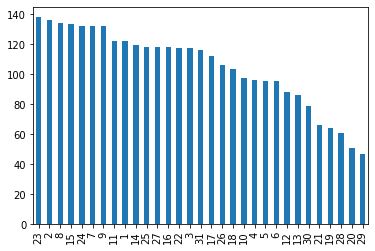

In [ ]:
short_tweets['day'].value_counts().plot(kind='bar')

Σε σύγκριση με τον Μάιο, τα άρθρα για την πανδημία αυξήθηκαν κατά πολύ τον Ιούνιο

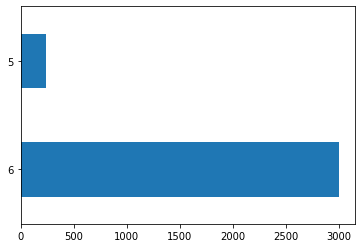

In [ ]:
short_tweets['month'].value_counts().plot(kind='barh') 

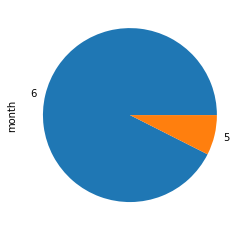

In [ ]:
short_tweets['month'].value_counts().plot(kind='pie') 


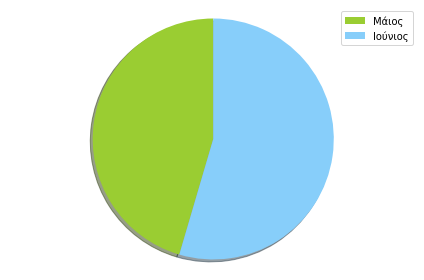

In [ ]:
import matplotlib.pyplot as plt

labels = ['Μάιος', 'Ιούνιος']
sizes = [5, 6]
colors = ['yellowgreen', 'lightskyblue']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

**Τα πιο δημοφιλή tweets**





In [ ]:
full_tweets_df.sort_values('favorite_count', ascending=False).groupby('full_text')['retweet_count','favorite_count'].first()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,retweet_count,favorite_count
full_text,,
#MeToo και στα Πανεπιστήμια: Από το ΑΠΘ μέχρι το ΕΚΠΑ «ανοίγουν» στόματα https://t.co/S0XPt177aI,1,1
10ετές ομόλογο: Ξεπερνούν τα 26 δισ. ευρώ οι προσφορές https://t.co/hnBGmOXi8b,0,0
200 καλλιτέχνες μαζί σε μια έκθεση για την Ελληνική Επανάσταση https://t.co/XuClFXeIJH,0,0
24ωρη απεργία σήμερα: Δείτε ποια μέσα μεταφοράς τραβούν χειρόφρενο https://t.co/KgZ3uH80AW,0,4
5α Μαθητικά Βραβεία YouSmile Awards: Ποτέ δεν είσαι πολύ μικρός για να αλλάξεις τον κόσμο https://t.co/kYhc4ruW0J,0,2
...,...,...
📣 Μη χάσετε με το ΘΕΜΑ που κυκλοφορεί \n\nhttps://t.co/xQVZouVIE8 https://t.co/xWsZgNHRom,0,1
📣 Μη χάσετε με το ΘΕΜΑ που κυκλοφορεί !\n\nhttps://t.co/Xxu5HzqT0t https://t.co/7Eqa3pYbKw,1,3
📣 Μη χάσετε με το ΘΕΜΑ που κυκλοφορεί!\n\nhttps://t.co/y0TlZSGYZA https://t.co/5uTshQCSWl,0,1


In [ ]:
full_tweets_df.sort_values('favorite_count', ascending=False).groupby('full_text')['retweet_count','favorite_count'].first(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,retweet_count,favorite_count
full_text,,
#MeToo και στα Πανεπιστήμια: Από το ΑΠΘ μέχρι το ΕΚΠΑ «ανοίγουν» στόματα https://t.co/S0XPt177aI,1,1
10ετές ομόλογο: Ξεπερνούν τα 26 δισ. ευρώ οι προσφορές https://t.co/hnBGmOXi8b,0,0
200 καλλιτέχνες μαζί σε μια έκθεση για την Ελληνική Επανάσταση https://t.co/XuClFXeIJH,0,0
24ωρη απεργία σήμερα: Δείτε ποια μέσα μεταφοράς τραβούν χειρόφρενο https://t.co/KgZ3uH80AW,0,4
5α Μαθητικά Βραβεία YouSmile Awards: Ποτέ δεν είσαι πολύ μικρός για να αλλάξεις τον κόσμο https://t.co/kYhc4ruW0J,0,2
...,...,...
📣 Μη χάσετε με το ΘΕΜΑ που κυκλοφορεί \n\nhttps://t.co/xQVZouVIE8 https://t.co/xWsZgNHRom,0,1
📣 Μη χάσετε με το ΘΕΜΑ που κυκλοφορεί !\n\nhttps://t.co/Xxu5HzqT0t https://t.co/7Eqa3pYbKw,1,3
📣 Μη χάσετε με το ΘΕΜΑ που κυκλοφορεί!\n\nhttps://t.co/y0TlZSGYZA https://t.co/5uTshQCSWl,0,1


In [ ]:
most_popular_protothema = full_tweets_df.sort_values('favorite_count', ascending=False).groupby('full_text')['retweet_count','favorite_count'].first(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
%matplotlib inline

In [ ]:
from textblob import TextBlob

blob = TextBlob("I love driving the car.")
blob.sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [ ]:

tweet = '''I am very disappointed in China. Our foolish past leaders 
have allowed them to make hundreds of billions of dollars a year in trade, yet
they do NOTHING for us with North Korea, just talk. We will no longer allow this
to continue. China could easily solve this problem!'''

TextBlob(tweet).sentiment

Sentiment(polarity=-0.22777777777777777, subjectivity=0.6861111111111112)

In [ ]:

"I tried to fish for fish but I didn't catch any fish".count("fish")

3

In [ ]:

fish_sentence = "I tried to fish for fish but I didn't catch any fish"
fish_sentence.split(" ")

['I',
 'tried',
 'to',
 'fish',
 'for',
 'fish',
 'but',
 'I',
 "didn't",
 'catch',
 'any',
 'fish']

In [ ]:
fish_sentence = "I tried to fish for fish but I didn't catch any fish"

In [ ]:
fish_sentence = "I tried to fish for fish but I didn't catch any fish"


In [ ]:
toucan_sentence = "The canny toucan can't recant the pelican's scant canteloupe"

In [ ]:
dinner_sentence = "Dinner was great tonight, I enjoyed the potatoes."
dinner_list = dinner_sentence.split(" ")
dinner_list

['Dinner', 'was', 'great', 'tonight,', 'I', 'enjoyed', 'the', 'potatoes.']

In [ ]:
dinner_list.count("dinner")

0

In [ ]:

dinner_sentence = "Dinner was great tonight, I enjoyed the potatoes."
dinner_sentence = dinner_sentence.lower().replace(".", " ")
dinner_list = dinner_sentence.split(" ")
dinner_list

['dinner', 'was', 'great', 'tonight,', 'i', 'enjoyed', 'the', 'potatoes', '']

In [ ]:
dinner_list.count("dinner")

1

In [ ]:
import spacy
nlp = spacy.load('en')

In [ ]:
doc = nlp("The dangerous cats ran dangerously toward dangers")
tokens = [token for token in doc]
tokens

[The, dangerous, cats, ran, dangerously, toward, dangers]

In [ ]:
text = "Today I went driving to the grocery store. I hate to drive the car, but I love visiting the gas station!"

In [ ]:

doc = nlp("The dangerous cats ran dangerously toward dangers.")
tokens = [token.lemma_ for token in doc]
tokens

['the', 'dangerous', 'cat', 'run', 'dangerously', 'toward', 'danger', '.']

In [ ]:
phrases = ['i love cars', 'i hate cars', 'i butter cars', 'misery and gloomy pain cars']
for phrase in phrases:
    doc = nlp(phrase)
    print("The sentiment for", doc, "is", doc[0].sentiment)

The sentiment for i love cars is 0.0
The sentiment for i hate cars is 0.0
The sentiment for i butter cars is 0.0
The sentiment for misery and gloomy pain cars is 0.0


In [ ]:

words = ['love', 'hate', 'butter', 'misery and gloomy pain']
for word in words:
    blob = TextBlob(word)
    print("The sentiment for", word, "is", blob.sentiment)

The sentiment for love is Sentiment(polarity=0.5, subjectivity=0.6)
The sentiment for hate is Sentiment(polarity=-0.8, subjectivity=0.9)
The sentiment for butter is Sentiment(polarity=0.0, subjectivity=0.0)
The sentiment for misery and gloomy pain is Sentiment(polarity=0.0, subjectivity=0.0)


In [ ]:
phrases = ['i love cars', 
           'i hate cars', 
           'cars butter cars', 
           'misery and gloomy pain cars',
           'the cars hate butter'
          ]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vec = CountVectorizer()
matrix = vec.fit_transform(phrases)

matrix

<5x9 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
short_tweets[short_tweets['year']==2020]['text']

Series([], Name: text, dtype: object)

In [ ]:
text = short_tweets['text'].str.replace('ά','α').str.replace("έ", "ε").str.replace('ή','η').str.replace('ί','ι').str.replace('ό','ο').str.replace('ύ','υ').str.replace('ώ','ω')

In [ ]:
text = short_tweets[short_tweets['year']==2020]['text'].str.cat(sep = ' ').replace("amp", ' ')

In [ ]:
list(STOPWORDS)[0:20]

['κάποιον',
 'του',
 'εξαιτίας',
 'τάχα',
 'εκείνοι',
 'όλος',
 'ετούτου',
 'μιαν',
 'τάδε',
 'έγινε',
 'τούτον',
 'και',
 'όσο',
 'πού',
 'στα',
 'μπρος',
 'καθεμίας',
 'πόσης',
 'υπόψιν',
 'κανείς']

In [ ]:
# Stop words
# Link to greek stop words: https://www.translatum.gr/forum/index.php?topic=3550.0?topic=3550.0
STOPWORDS = set(
    """
αδιάκοπα αι ακόμα ακόμη ακριβώς άλλα αλλά αλλαχού άλλες άλλη άλλην
άλλης αλλιώς αλλιώτικα άλλο άλλοι αλλοιώς αλλοιώτικα άλλον άλλος άλλοτε αλλού
άλλους άλλων άμα άμεσα αμέσως αν ανά ανάμεσα αναμεταξύ άνευ αντί αντίπερα αντίς
άνω ανωτέρω άξαφνα απ απέναντι από απόψε άρα άραγε αρκετά αρκετές
αρχικά ας αύριο αυτά αυτές αυτή αυτήν αυτής αυτό αυτοί αυτόν αυτός αυτού αυτούς
αυτών αφότου αφού
βέβαια βεβαιότατα
γι για γιατί γρήγορα γύρω
δα δε δείνα δεν δεξιά δήθεν δηλαδή δι δια διαρκώς δικά δικό δικοί δικός δικού
δικούς διόλου δίπλα δίχως
εάν εαυτό εαυτόν εαυτού εαυτούς εαυτών έγκαιρα εγκαίρως εγώ εδώ ειδεμή είθε είμαι
είμαστε είναι εις είσαι είσαστε είστε είτε είχα είχαμε είχαν είχατε είχε είχες έκαστα
έκαστες έκαστη έκαστην έκαστης έκαστο έκαστοι έκαστον έκαστος εκάστου εκάστους εκάστων
εκεί εκείνα εκείνες εκείνη εκείνην εκείνης εκείνο εκείνοι εκείνον εκείνος εκείνου
εκείνους εκείνων εκτός εμάς εμείς εμένα εμπρός εν ένα έναν ένας ενός εντελώς εντός
εναντίον  εξής  εξαιτίας  επιπλέον επόμενη εντωμεταξύ ενώ εξ έξαφνα εξήσ εξίσου έξω επάνω
επειδή έπειτα επί επίσης επομένως εσάς εσείς εσένα έστω εσύ ετέρα ετέραι ετέρας έτερες
έτερη έτερης έτερο έτεροι έτερον έτερος ετέρου έτερους ετέρων ετούτα ετούτες ετούτη ετούτην
ετούτης ετούτο ετούτοι ετούτον ετούτος ετούτου ετούτους ετούτων έτσι εύγε ευθύς ευτυχώς εφεξής
έχει έχεις έχετε έχομε έχουμε έχουν εχτές έχω έως έγιναν  έγινε  έκανε  έξι  έχοντας
η ήδη ήμασταν ήμαστε ήμουν ήσασταν ήσαστε ήσουν ήταν ήτανε ήτοι ήττον
θα
ι ιδία ίδια ίδιαν ιδίας ίδιες ίδιο ίδιοι ίδιον ίδιοσ ίδιος ιδίου ίδιους ίδιων ιδίως ιι ιιι
ίσαμε ίσια ίσως
κάθε καθεμία καθεμίας καθένα καθένας καθενός καθετί καθόλου καθώς και κακά κακώς καλά
καλώς καμία καμίαν καμίας κάμποσα κάμποσες κάμποση κάμποσην κάμποσης κάμποσο κάμποσοι
κάμποσον κάμποσος κάμποσου κάμποσους κάμποσων κανείς κάνεν κανένα κανέναν κανένας
κανενός κάποια κάποιαν κάποιας κάποιες κάποιο κάποιοι κάποιον κάποιος κάποιου κάποιους
κάποιων κάποτε κάπου κάπως κατ κατά κάτι κατιτί κατόπιν κάτω κιόλας κλπ κοντά κτλ κυρίως
λιγάκι λίγο λιγότερο λόγω λοιπά λοιπόν
μα μαζί μακάρι μακρυά μάλιστα μάλλον μας με μεθαύριο μείον μέλει μέλλεται μεμιάς μεν
μερικά μερικές μερικοί μερικούς μερικών μέσα μετ μετά μεταξύ μέχρι μη μήδε μην μήπως
μήτε μια μιαν μιας μόλις μολονότι μονάχα μόνες μόνη μόνην μόνης μόνο μόνοι μονομιάς
μόνος μόνου μόνους μόνων μου μπορεί μπορούν μπρος μέσω  μία  μεσώ με μου
να ναι νωρίς
ξανά ξαφνικά
ο οι όλα όλες όλη όλην όλης όλο ολόγυρα όλοι όλον ολονέν όλος ολότελα όλου όλους όλων
όλως ολωσδιόλου όμως όποια οποιαδήποτε οποίαν οποιανδήποτε οποίας οποίος οποιασδήποτε οποιδήποτε
όποιες οποιεσδήποτε όποιο οποιοδηήποτε όποιοι όποιον οποιονδήποτε όποιος οποιοσδήποτε
οποίου οποιουδήποτε οποίους οποιουσδήποτε οποίων οποιωνδήποτε όποτε οποτεδήποτε όπου
οπουδήποτε όπως ορισμένα ορισμένες ορισμένων ορισμένως όσα οσαδήποτε όσες οσεσδήποτε
όση οσηδήποτε όσην οσηνδήποτε όσης οσησδήποτε όσο οσοδήποτε όσοι οσοιδήποτε όσον οσονδήποτε
όσος οσοσδήποτε όσου οσουδήποτε όσους οσουσδήποτε όσων οσωνδήποτε όταν ότι οτιδήποτε
ότου ου ουδέ ούτε όχι οποία  οποίες  οποίο  οποίοι  οπότε  ος
πάνω  παρά  περί  πολλά  πολλές  πολλοί  πολλούς  που  πρώτα  πρώτες  πρώτη  πρώτο  πρώτος  πως
πάλι πάντα πάντοτε παντού πάντως πάρα πέρα πέρι περίπου περισσότερο πέρσι πέρυσι πια πιθανόν
πιο πίσω πλάι πλέον πλην ποιά ποιάν ποιάς ποιές ποιό ποιοί ποιόν ποιός ποιού ποιούς
ποιών πολύ πόσες πόση πόσην πόσης πόσοι πόσος πόσους πότε ποτέ πού πούθε πουθενά πρέπει
πριν προ προκειμένου πρόκειται πρόπερσι προς προτού προχθές προχτές πρωτύτερα πώς
σαν σας σε σεις σου στα στη στην στης στις στο στον στου στους στων συγχρόνως
συν συνάμα συνεπώς συχνάς συχνές συχνή συχνήν συχνής συχνό συχνοί συχνόν
συχνός συχνού συχνούς συχνών συχνώς σχεδόν στο
τα τάδε ταύτα ταύτες ταύτη ταύτην ταύτης ταύτοταύτον ταύτος ταύτου ταύτων τάχα τάχατε
τελευταία  τελευταίο  τελευταίος  τού  τρία  τρίτη  τρεις τελικά τελικώς τες τέτοια τέτοιαν
τέτοιας τέτοιες τέτοιο τέτοιοι τέτοιον τέτοιος τέτοιου
τέτοιους τέτοιων τη την της τι τίποτα τίποτε τις το τοι τον τοσ τόσα τόσες τόση τόσην
τόσης τόσο τόσοι τόσον τόσος τόσου τόσους τόσων τότε του τουλάχιστο τουλάχιστον τους τούς τούτα
τούτες τούτη τούτην τούτης τούτο τούτοι τούτοις τούτον τούτος τούτου τούτους τούτων τυχόν
των τώρα του
υπ υπέρ υπό υπόψη υπόψιν ύστερα
χωρίς χωριστά
ω ως ωσάν ωσότου ώσπου ώστε ωστόσο ωχ
""".split()
)

In [ ]:
wordcloud = WordCloud(
#   stopwords = STOPWORDS,
    width = 1000,
    height = 2000,
    background_color = 'yellow'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
doc = nlp(short_tweets['text'][1])

In [ ]:
for token in doc:
    print(token, token.lemma_)

Τριχωνίδα τριχωνίδα
: :
42χρονος 42χρονος
ιερέας ιερέας
φέρεται φέρεται
να να
ασέλγησε ασέλγησε
σε σε
γυναίκα γυναίκα
μπροστά μπροστά
στα στα
μάτια μάτια
του του
συζύγου συζύγου
της της
! !
https://t.co/HL6db2Ygql https://t.co/HL6db2Ygql


In [ ]:
' '.join(token.lemma_ for token in doc)

'τριχωνίδα : 42χρονος ιερέας φέρεται να ασέλγησε σε γυναίκα μπροστά στα μάτια του συζύγου της !  '

In [ ]:
text

''

In [ ]:
full_doc = nlp(text)

In [ ]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [ ]:
clear_text[100:200]

''

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'yellow'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
#vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
count_vector = cv.fit_transform(short_tweets['text'])

In [ ]:
count_vector.shape

(3250, 13699)

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

,00,000,0000,003p0c3ad3,005qgbji48,007,00a7sdpvwm,00lfkp0con,01,032ukb76jv,03awfpyumv,03hodytjyv,04zozqzoum,05,05nzdlfar0,05yuxmkvlg,06,07gis2xmj0,088,08z7tt4jhs,0968g7vihh,0ael913bmd,0afz8aweg8,0arj68tyvv,0bhfkrlhso,0cgooklfih,0cv5sbiwdl,0dwcbaav8u,0e5lfkcfa3,0ehofyaksi,0eqas8ni4n,0flqwzywrc,0ftlssocgp,0gphro7jup,0gsbgqndco,0h1afe45iv,0hn4nne8pt,0hu0xc9e70,0i9tl84bip,0ijlxsiu8e,...,όραμά,όρασης,όργιο,όριο,όρκας,όροι,όρος,όρους,όροφο,όρχεις,όσα,όσες,όσο,όσοι,όσους,όσων,όταν,ότι,όφελος,όχημά,όχημα,όχι,όψη,ύδρα,ύδρευσης,ύμνο,ύπνο,ύπνωση,ύποπτοι,ύποπτος,ύστερα,ύφαλος,ύψη,ύψος,ύψους,ώθηση,ώκλαντ,ώρα,ώρας,ώρες
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [ ]:
count_vector = cv.fit_transform(short_tweets['text'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

,000,18,2020,24,euro,garros,live,roland,survivor,έγκλημα,ένα,έχει,ήταν,αθήνα,από,βίντεο,βιασμό,βρέθηκε,για,γιατί,γλυκά,δείτε,δεν,δολοφονία,δύο,είναι,είχε,ελλάδα,επίθεση,ευρώ,ηπα,θάνατοι,θα,θεσσαλονίκη,κίνηση,και,καιρός,καρολάιν,κατά,καταιγίδες,...,νέο,να,νερά,οι,πάνω,πανδημία,που,πού,πρώην,πρώτη,πώς,σήμερα,σε,στα,στη,στην,στις,στο,στον,στους,τέλος,τα,τη,την,της,τι,τις,το,τον,του,τουρκία,τους,των,τώρα,φωτογραφία,φωτογραφίες,χρόνια,χωρίς,ότι,ώρες
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['-PRON-', 'regard', 'use'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,...,2020,euro,garros,live,roland,survivor,έγκλημα,ένα,έχει,ήταν,αθήνα,από,βίντεο,βρέθηκε,για,γιατί,γλυκά,δείτε,δεν,δολοφονία,δύο,είναι,είχε,ελλάδα,επίθεση,ευρώ,ηπα,θάνατοι,θεσσαλονίκη,κίνηση,και,καιρός,καρολάιν,κατά,καταιγίδες,κορωνοϊό,κορωνοϊός,κρήτη,κρούσματα,...,μέσα,μας,μετά,μια,μου,μύκονος,νέα,νέο,νερά,πάνω,πανδημία,που,πού,πρώην,πρώτη,πώς,σήμερα,στα,στη,στην,στις,στο,στον,στους,τέλος,την,της,τις,τον,του,τουρκία,τους,των,τώρα,φωτογραφία,φωτογραφίες,χρόνια,χωρίς,ότι,ώρες
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
results.sum(axis =0).sort_values(ascending = False)

και         941
του         914
για         894
της         817
από         595
           ... 
κρήτη        34
βρέθηκε      34
survivor     34
τώρα         33
κορωνοϊό     33
Length: 81, dtype: int64

In [ ]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

και    939
του    914
για    889
της    817
από    595
dtype: int64

In [ ]:
results.sum(axis =0).sort_values(ascending = False)

και         939
του         914
για         889
της         817
από         595
           ... 
κρήτη        34
βρέθηκε      34
survivor     34
τώρα         33
κορωνοϊό     33
Length: 81, dtype: int64

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['κορωνοϊό'] #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

In [ ]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [ ]:
sum_words.sort_values(ascending = False).head(16)

και      939
του      914
για      889
της      817
από      595
την      572
τον      458
στο      447
στην     423
που      379
στη      262
στα      251
δείτε    236
των      219
τους     212
στον     202
dtype: int64

In [ ]:
most_common=sum_words.sort_values(ascending = False).head(16)

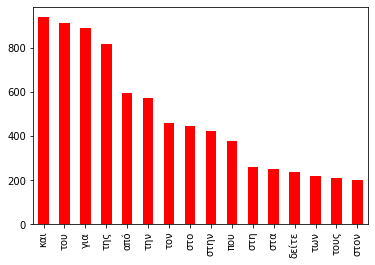

In [ ]:
most_common.plot(kind='bar',color='red')

In [ ]:
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [ ]:
import spacy

In [ ]:
nlp = spacy.load('el_core_news_sm')

OSError: ignored

In [ ]:
list(nlp.Defaults.stop_words)[0:20]

['others',
 'nothing',
 'how',
 'somehow',
 'two',
 'just',
 'most',
 'had',
 'four',
 'wherein',
 'empty',
 'last',
 'none',
 '‘d',
 'ten',
 'nevertheless',
 'some',
 'in',
 'own',
 'very']